# Comparison of Chemical Spaces (Protein vs RNA Binders)

In this short tutorial, we will explore different methods to compare chemical data sets by the use of visualization. We will use a data set of RNA binders and a data set of protein binders to showcase how overlaps and distinct features of chemical data sets can be observed. 

## Obtaining Data Sets
We can obtain the RNA binders data set as follows:

In [1]:
from rdkit.Chem import PandasTools

robin_rna_sdf = "thesis_input_data/set2_small/raw_data/ROBIN_RNA_Binders_3D.sdf"
df_robin_rna = PandasTools.LoadSDF(robin_rna_sdf, smilesName='Smile')
df_robin_rna.head()

,Smile,ID,ROMol
0,CC(=O)c1ccc(Br)c(N)c1,0054-0090,<rdkit.Chem.rdchem.Mol object at 0x7f5a889e0ba0>
1,O=C(NCCO)c1cc2ccccc2oc1=O,0096-0280,<rdkit.Chem.rdchem.Mol object at 0x7f5a889e0c10>
2,Nc1ccc2oc(-c3ccccc3)nc2c1,0109-0002,<rdkit.Chem.rdchem.Mol object at 0x7f5a7a16dbd0>
3,Nc1ccc(-c2nc3ccccc3o2)cc1,0109-0045,<rdkit.Chem.rdchem.Mol object at 0x7f5a7a16d5b0>
4,Cc1nc2ccc(CCO)cc2s1,0133-0036,<rdkit.Chem.rdchem.Mol object at 0x7f5a7a16dd20>


In [2]:
del df_robin_rna["ROMol"] # get rid of rdkit molecules from the data frame (they will be generated as needed)
df_robin_rna.shape

(2003, 2)

The protein binders on the other hand come from a different file. This time it is a CSV file, which we can load more directly:

In [3]:
import pandas as pd

df_protbin = pd.read_csv("thesis_input_data/set2_small/raw_data/drugs_protbin_2952_orig.csv")
df_protbin.head()

,pdid,name,smiles,inchi,inchikey,probe,experimental probe,calculated probe,available,approved drug,...,hbd,rb,rc,arc,logp,tpsa,fcsp3,ncc,lrs,qed
0,PD000042,ETOFYLLINE,Cn1c(=O)c2c(ncn2CCO)n(C)c1=O,InChI=1S/C9H12N4O3/c1-11-7-6(8(15)12(2)9(11)16...,NWPRCRWQMGIBOT-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,1.0,2.0,2.0,2.0,-1.57,82.05,0.44,0.0,6.0,0.67
1,PD000044,pentetrazol,C1CCc2nnnn2CC1,InChI=1S/C6H10N4/c1-2-4-6-7-8-9-10(6)5-3-1/h1-5H2,CWRVKFFCRWGWCS-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,0.0,0.0,2.0,1.0,0.40,43.60,0.83,0.0,7.0,0.52
2,PD000047,PODOFILOX,COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...,InChI=1S/C22H22O8/c1-25-16-4-10(5-17(26-2)21(1...,YJGVMLPVUAXIQN-XVVDYKMHSA-N,1.0,NaN,1.0,1.0,1,...,1.0,4.0,5.0,2.0,2.41,92.68,0.41,4.0,6.0,0.76
3,PD000048,METOLAZONE,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,AQCHWTWZEMGIFD-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,2.0,2.0,3.0,2.0,2.71,92.50,0.19,1.0,6.0,0.86
4,PD000049,METYROSINE,C[C@](N)(Cc1ccc(O)cc1)C(=O)O,"InChI=1S/C10H13NO3/c1-10(11,9(13)14)6-7-2-4-8(...",NHTGHBARYWONDQ-JTQLQIEISA-N,NaN,NaN,NaN,1.0,1,...,3.0,3.0,1.0,1.0,0.74,83.55,0.30,1.0,6.0,0.66


Next, we label each data set:

In [4]:
df_robin_rna.rename(columns={"Smile": "SMILES", "ID": "QSPRID"}, inplace=True)
df_robin_rna["Set"] = "RNA Binders"
df_robin_rna.head()

,SMILES,QSPRID,Set
0,CC(=O)c1ccc(Br)c(N)c1,0054-0090,RNA Binders
1,O=C(NCCO)c1cc2ccccc2oc1=O,0096-0280,RNA Binders
2,Nc1ccc2oc(-c3ccccc3)nc2c1,0109-0002,RNA Binders
3,Nc1ccc(-c2nc3ccccc3o2)cc1,0109-0045,RNA Binders
4,Cc1nc2ccc(CCO)cc2s1,0133-0036,RNA Binders


In [5]:
df_protbin.rename(columns={"smiles": "SMILES", "pdid": "QSPRID"}, inplace=True)
df_protbin["Set"] = "Protein Binders" 
df_protbin.head()

,QSPRID,name,SMILES,inchi,inchikey,probe,experimental probe,calculated probe,available,approved drug,...,rb,rc,arc,logp,tpsa,fcsp3,ncc,lrs,qed,Set
0,PD000042,ETOFYLLINE,Cn1c(=O)c2c(ncn2CCO)n(C)c1=O,InChI=1S/C9H12N4O3/c1-11-7-6(8(15)12(2)9(11)16...,NWPRCRWQMGIBOT-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,2.0,2.0,2.0,-1.57,82.05,0.44,0.0,6.0,0.67,Protein Binders
1,PD000044,pentetrazol,C1CCc2nnnn2CC1,InChI=1S/C6H10N4/c1-2-4-6-7-8-9-10(6)5-3-1/h1-5H2,CWRVKFFCRWGWCS-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,0.0,2.0,1.0,0.40,43.60,0.83,0.0,7.0,0.52,Protein Binders
2,PD000047,PODOFILOX,COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[...,InChI=1S/C22H22O8/c1-25-16-4-10(5-17(26-2)21(1...,YJGVMLPVUAXIQN-XVVDYKMHSA-N,1.0,NaN,1.0,1.0,1,...,4.0,5.0,2.0,2.41,92.68,0.41,4.0,6.0,0.76,Protein Binders
3,PD000048,METOLAZONE,Cc1ccccc1N1C(=O)c2cc(S(N)(=O)=O)c(Cl)cc2NC1C,InChI=1S/C16H16ClN3O3S/c1-9-5-3-4-6-14(9)20-10...,AQCHWTWZEMGIFD-UHFFFAOYSA-N,NaN,NaN,NaN,1.0,1,...,2.0,3.0,2.0,2.71,92.50,0.19,1.0,6.0,0.86,Protein Binders
4,PD000049,METYROSINE,C[C@](N)(Cc1ccc(O)cc1)C(=O)O,"InChI=1S/C10H13NO3/c1-10(11,9(13)14)6-7-2-4-8(...",NHTGHBARYWONDQ-JTQLQIEISA-N,NaN,NaN,NaN,1.0,1,...,3.0,1.0,1.0,0.74,83.55,0.30,1.0,6.0,0.66,Protein Binders


For easier access to cheminformatics features, we convert this data set to a [QSPRPred's](https://github.com/CDDLeiden/QSPRPred) [`MoleculeTable`](https://cddleiden.github.io/QSPRpred/docs/api/qsprpred.data.tables.html#qsprpred.data.tables.mol.MoleculeTable):

In [6]:
from qsprpred.data import MoleculeTable

dataset = MoleculeTable(
    name="Prot_RNA_Binders", 
    df=pd.concat([df_robin_rna, df_protbin]),
    smiles_col="SMILES",
    index_cols=["QSPRID"],
)
len(dataset)

4955

This gives us the power to query the data for various RNA-specific binding patterns (see [10.1002/anie.202211358](https://onlinelibrary.wiley.com/doi/10.1002/anie.202211358), Table 2)

In [7]:
from qsprpred.plotting.grid_visualizers import smiles_to_grid, interactive_grid

smarts_selection = dataset.searchWithSMARTS(["c1ccccc1Cc2cncs2"])
# smarts_selection = dataset.searchWithSMARTS(["c1cccc2c1OCC2"]) # less specific pattern (hits protein space as well)
smiles_to_grid(smarts_selection.smiles, impl=interactive_grid)

MolGridWidget()

### Calculating RDKit Descriptors

The easiest way to explore a chemical data set is to look at some basic descriptors. We can calculate the standard RDKit set to cover most things:

In [8]:
from qsprpred.data.descriptors.sets import RDKitDescs

rdkit_descs = RDKitDescs()
dataset.addDescriptors([rdkit_descs])

In [9]:
dataset.getDescriptors().head()

,RDkit_AvgIpc,RDkit_BCUT2D_CHGHI,RDkit_BCUT2D_CHGLO,RDkit_BCUT2D_LOGPHI,RDkit_BCUT2D_LOGPLOW,RDkit_BCUT2D_MRHI,RDkit_BCUT2D_MRLOW,RDkit_BCUT2D_MWHI,RDkit_BCUT2D_MWLOW,RDkit_BalabanJ,...,RDkit_fr_sulfonamd,RDkit_fr_sulfone,RDkit_fr_term_acetylene,RDkit_fr_tetrazole,RDkit_fr_thiazole,RDkit_fr_thiocyan,RDkit_fr_thiophene,RDkit_fr_unbrch_alkane,RDkit_fr_urea,RDkit_qed
QSPRID,,,,,,,,,,,,,,,,,,,,,
0054-0090,1.941518,2.002371,-1.987573,2.195860,-1.941181,9.103670,0.101301,79.918732,10.133175,3.151550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.574900
0096-0280,2.347198,2.119879,-2.024756,2.117391,-2.298650,5.960511,0.094101,16.393143,10.154997,2.437860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.757097
0109-0002,2.728073,2.066324,-1.910334,2.244417,-1.816999,5.788838,0.619656,16.347965,10.207189,2.192790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627765
0109-0045,2.731281,2.060433,-1.947104,2.238412,-1.830988,5.756536,0.619658,16.347954,10.184940,2.150228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.627765
0133-0036,2.444034,2.001608,-1.956216,2.220415,-1.884640,7.180299,0.299454,32.133537,10.146704,2.481967,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.792297


However, we will focus on just the selected few:

In [10]:
for col in ["RDkit_qed", "RDkit_MolLogP", "RDkit_ExactMolWt", "RDkit_TPSA"]:
    dataset.addProperty(col, dataset.getDescriptors()[col])

Descriptors can be explored and compared individually using histograms:

<Axes: xlabel='RDkit_qed', ylabel='Count'>

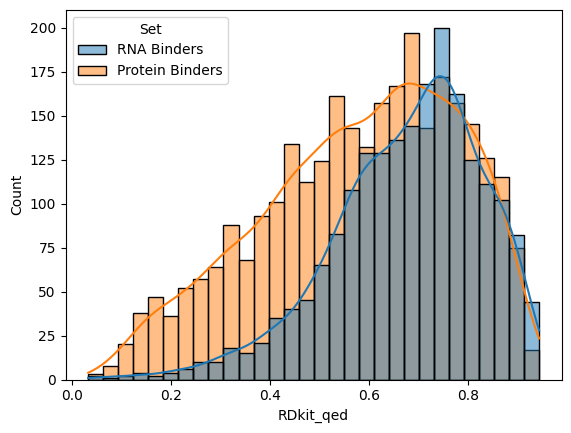

In [11]:
import seaborn as sns

sns.histplot(dataset.getDF(), x="RDkit_qed", hue="Set", kde=True) # https://www.nature.com/articles/nchem.1243

<Axes: xlabel='RDkit_ExactMolWt', ylabel='Count'>

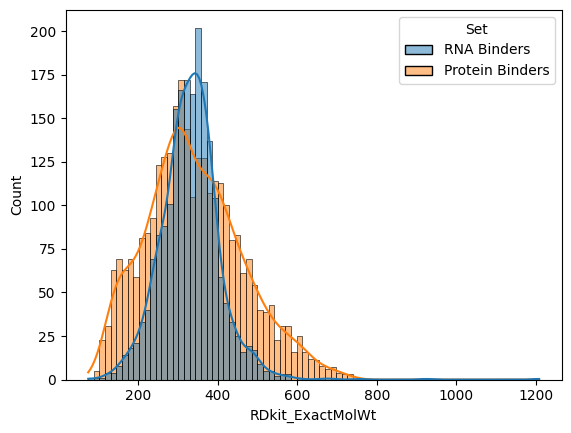

In [12]:
import seaborn as sns

sns.histplot(dataset.getDF(), x="RDkit_ExactMolWt", hue="Set", kde=True)

<Axes: xlabel='RDkit_TPSA', ylabel='Count'>

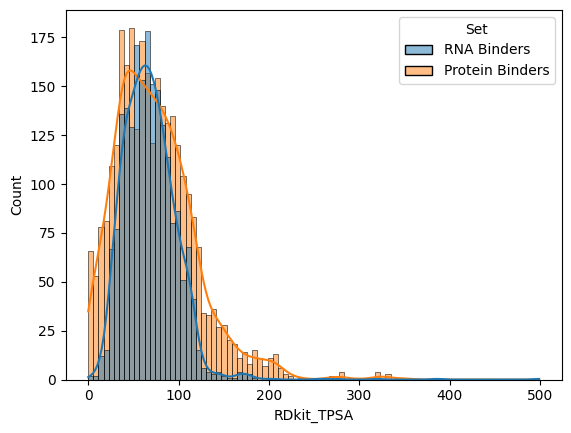

In [13]:
import seaborn as sns

sns.histplot(dataset.getDF(), x="RDkit_TPSA", hue="Set", kde=True)

<Axes: xlabel='RDkit_MolLogP', ylabel='Count'>

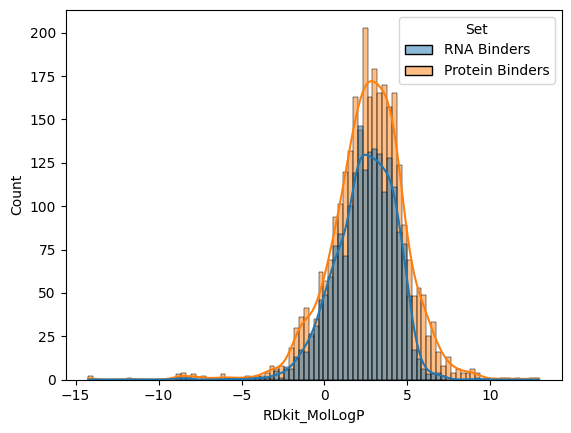

In [14]:
sns.histplot(dataset.getDF(), x="RDkit_MolLogP", hue="Set", kde=True)

We can also use 2D depiction techniques with two descriptors at once:

<Axes: xlabel='RDkit_ExactMolWt', ylabel='RDkit_MolLogP'>

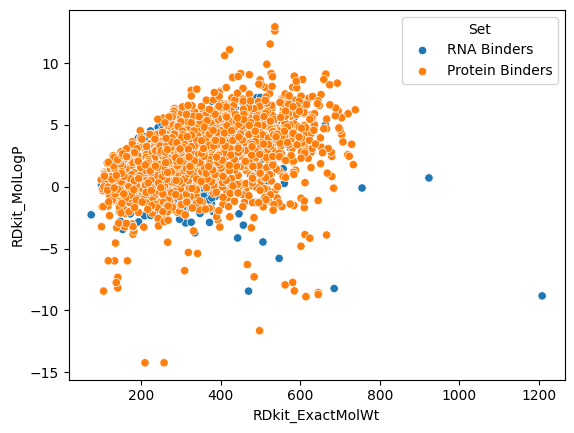

In [20]:
sns.scatterplot(dataset.getDF(), x="RDkit_ExactMolWt", y="RDkit_MolLogP", hue="Set")

<Axes: xlabel='RDkit_ExactMolWt', ylabel='RDkit_qed'>

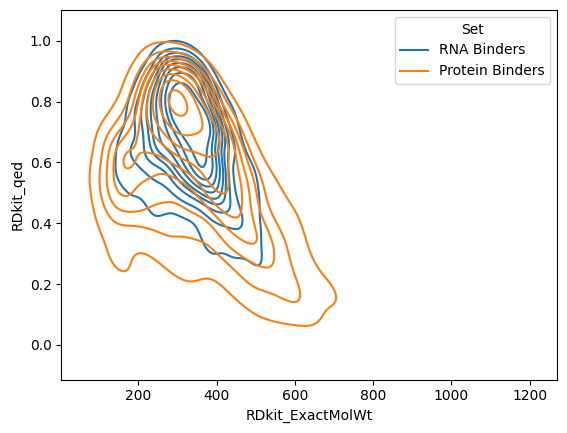

In [28]:
sns.kdeplot(dataset.getDF(), x="RDkit_ExactMolWt", y="RDkit_qed", hue="Set")

## Chemical Space Visualization by Dimensionality Reduction (Continuous Descriptors)

It is clear that the methods above have certain limitations with the main one being that we cannot take into account more than two descriptors at a time. However, there are a plethora of dimensionality reduction methods at our disposal that can help. However, most of these methods require standardization of the data so let us do that quickly before we start:

In [29]:
from sklearn.preprocessing import StandardScaler
from qsprpred.data.descriptors.sets import DataFrameDescriptorSet

df_descs = dataset.getDescriptors()
columns_with_na = df_descs.columns[df_descs.isna().any()].tolist()
df_descs = df_descs.loc[:,~df_descs.columns.isin(columns_with_na)]
scaled = StandardScaler().fit_transform(df_descs)
df_descs[:] = scaled
dataset.descriptors = []
dataset.addDescriptors([DataFrameDescriptorSet(df=df_descs)])
dataset.getDescriptors().head()

,DataFrame_RDkit_AvgIpc,DataFrame_RDkit_BalabanJ,DataFrame_RDkit_BertzCT,DataFrame_RDkit_Chi0,DataFrame_RDkit_Chi0n,DataFrame_RDkit_Chi0v,DataFrame_RDkit_Chi1,DataFrame_RDkit_Chi1n,DataFrame_RDkit_Chi1v,DataFrame_RDkit_Chi2n,...,DataFrame_RDkit_fr_sulfonamd,DataFrame_RDkit_fr_sulfone,DataFrame_RDkit_fr_term_acetylene,DataFrame_RDkit_fr_tetrazole,DataFrame_RDkit_fr_thiazole,DataFrame_RDkit_fr_thiocyan,DataFrame_RDkit_fr_thiophene,DataFrame_RDkit_fr_unbrch_alkane,DataFrame_RDkit_fr_urea,DataFrame_RDkit_qed
QSPRID,,,,,,,,,,,,,,,,,,,,,
0054-0090,-1.913114,1.990057,-1.333232,-1.583941,-1.660563,-1.439199,-1.694980,-1.696168,-1.575027,-1.548482,...,-0.217316,-0.133641,-0.080623,-0.092459,-0.191085,0.0,-0.198682,-0.161856,-0.173537,-0.245393
0096-0280,-0.963271,0.765860,-0.424995,-0.873120,-1.020029,-1.148459,-0.848181,-0.994160,-1.158366,-1.071094,...,-0.217316,-0.133641,-0.080623,-0.092459,-0.191085,0.0,-0.198682,-0.161856,-0.173537,0.726380
0109-0002,-0.071502,0.345491,-0.347940,-1.113701,-1.113819,-1.243317,-0.955184,-1.029106,-1.193068,-1.011098,...,-0.217316,-0.133641,-0.080623,-0.092459,-0.191085,0.0,-0.198682,-0.161856,-0.173537,0.036569
0109-0045,-0.063992,0.272485,-0.454589,-1.113701,-1.113819,-1.243317,-0.955184,-1.029106,-1.193068,-1.012505,...,-0.217316,-0.133641,-0.080623,-0.092459,-0.191085,0.0,-0.198682,-0.161856,-0.173537,0.036569
0133-0036,-0.736541,0.841518,-0.961029,-1.429788,-1.359291,-1.307750,-1.372929,-1.306744,-1.180011,-1.256896,...,-0.217316,-0.133641,-0.080623,-0.092459,4.766112,0.0,-0.198682,-0.161856,-0.173537,0.914119


Now we can focus on each techniques and explore its influential hyperparameters if any (looking at you, PCA):

- [PCA](https://setosa.io/ev/principal-component-analysis/)
- [UMAP/t-SNE](https://pair-code.github.io/understanding-umap/)

**Can you guess what each parameter is doing from the plots below?**

In [31]:
# Suppress PerformanceWarning
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

from scaffviz.clustering.manifold import TSNE, UMAP, PCA
from scaffviz.depiction.plot import Plot

for idx, plt in enumerate([
    Plot(PCA()),
    Plot(UMAP(n_neighbors=5, min_dist=0.1, random_state=42)),
    Plot(UMAP(n_neighbors=30, min_dist=0.5, random_state=42)),
    Plot(UMAP(n_neighbors=100, min_dist=0.9, random_state=42)),
    Plot(TSNE(perplexity=5, random_state=42)),
    Plot(TSNE(perplexity=30, random_state=42)),
    Plot(TSNE(perplexity=100, random_state=42)),
]):
    print("Plotting:", plt.manifold)
    plt.plot(
        dataset,
        color_by='Set',
        recalculate=True,
        card_data=[
            'Set',
            'ID'
        ],
        port=8000 + idx,
        viewport_height=800
    )

Plotting: PCA
Dash is running on http://127.0.0.1:8000/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Dash is running on http://127.0.0.1:8001/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Dash is running on http://127.0.0.1:8002/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Dash is running on http://127.0.0.1:8003/



Plotting: TSNE
Dash is running on http://127.0.0.1:8004/



Plotting: TSNE
Dash is running on http://127.0.0.1:8005/



Plotting: TSNE
Dash is running on http://127.0.0.1:8006/



## Chemical Space Visualization by Dimensionality Reduction (Binary Fingerprints)

When using binary fingerprints, we can take an alternative approach by actually redifining the distance metric by reducing it to the Jaccard distance (i.e. Tanimoto Similarity):

In [32]:
from qsprpred.data.descriptors.fingerprints import MorganFP

dataset.descriptors = []
morgan_fp = MorganFP(3, 2048)
dataset.addDescriptors([morgan_fp])

**Any surprising results below?**

In [33]:
for idx, plt in enumerate([
    Plot(PCA()),
    Plot(UMAP(n_neighbors=5, min_dist=0.1, metric="jaccard", random_state=42)),
    Plot(UMAP(n_neighbors=30, min_dist=0.5, metric="jaccard", random_state=42)),
    Plot(UMAP(n_neighbors=100, min_dist=0.9, metric="jaccard", random_state=42)),
    Plot(TSNE(perplexity=30, metric="jaccard", random_state=42)),
    Plot(TSNE(perplexity=30, random_state=42)),
]):
    print("Plotting:", plt.manifold)
    plt.plot(
        dataset,
        color_by='Set',
        recalculate=True,
        card_data=[
            'Set',
            'ID'
        ],
        port=8100 + idx,
        viewport_height=800
    )

Plotting: PCA
Dash is running on http://127.0.0.1:8100/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1887: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/pynndescent/pynndescent_.py:939: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:127: UserWarning:

A few of your vertices were disconnected from the manifold.  This shouldn't cause problems.
Disconnection_distance = 1 has removed 12 edges.
It has only fully disconnected

Dash is running on http://127.0.0.1:8101/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1887: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Dash is running on http://127.0.0.1:8102/



Plotting: UMAP


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1887: UserWarning:

gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/pynndescent/pynndescent_.py:939: UserWarning:

Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.



Dash is running on http://127.0.0.1:8103/



Plotting: TSNE


/home/sichom/software/micromamba/envs/8add-chemspace-denovo/lib/python3.12/site-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning:

Data was converted to boolean for metric jaccard



Dash is running on http://127.0.0.1:8104/



Plotting: TSNE
Dash is running on http://127.0.0.1:8105/



<Axes: xlabel='RDkit_ExactMolWt', ylabel='RDkit_qed'>

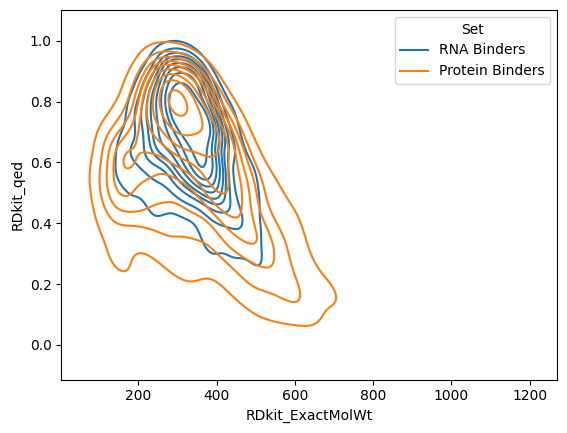

In [35]:
sns.kdeplot(dataset.getDF(), x="RDkit_ExactMolWt", y="RDkit_qed", hue="Set")

In [34]:
plt.plot(
    dataset,
    x="RDkit_ExactMolWt",
    y="RDkit_qed",
    color_by='Set',
    recalculate=False,
    card_data=[
        'Set',
        'ID'
    ],
    port=8200,
    viewport_height=800
)

Dash is running on http://127.0.0.1:8200/

